# CApturing NAN values with a new feature, 
# End Of Distribution imputation
#######################################################################################

# CApturing NAN values with a new feature
#### It works well if the data are not missing completely at random (Systematic missing)


In [1]:
import pandas as pd
import numpy as np

In [2]:
df =  pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age_NAN'] = np.where(df['Age'].isnull(), 1, 0)

In [5]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
# we can fill all the na values of Age column with either mean or median

In [10]:
df['Age'].fillna(df['Age'].dropna().median(), inplace=True)

In [11]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## Advantages:
1. Easy to implement
2. Captures the importance of missing values

## Disadvantages:
1. Creating Additional features(Curse of Dimensionality)

###########################################################################################################################
## End Of Distribution imputation
1. It works well if the data are not missing completely at random (Systematic missing)


In [27]:
df =  pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

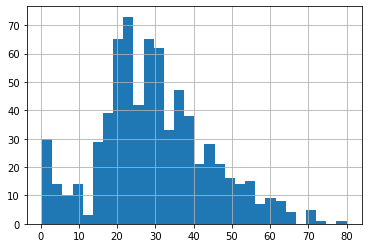

In [28]:
df.Age.hist(bins=30)

In [29]:
df.Age.mean()

29.69911764705882

In [30]:
extreme =df.Age.mean() + 3 * df.Age.std()
extreme

73.27860964406095

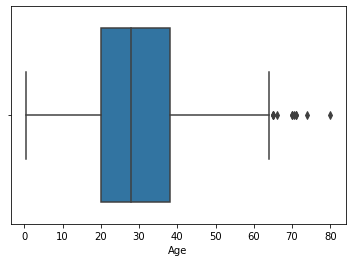

In [31]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [32]:
def impute_nan(df, variable, median, extreme):
    df[variable + 'end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [33]:
impute_nan(df, 'Age', df['Age'].median(), extreme)

In [34]:
df.head(20)

,Survived,Age,Fare,Ageend_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


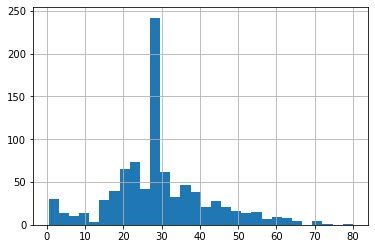

In [35]:
df['Age'].hist(bins=30)

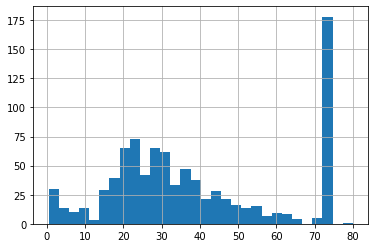

In [36]:
df['Ageend_distribution'].hist(bins=30)

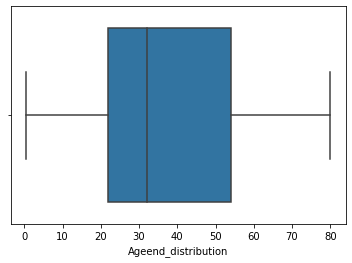

In [37]:
sns.boxplot('Ageend_distribution', data=df)